<a href="https://colab.research.google.com/github/hws2002/Time_Series_Forecasting_in_Python/blob/main/simulation/simulation_ARMA(1%2C1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARMA(1,1)프로세스를 시뮬레이션해보자.  
이는 MA(1)프로세스와 AR(1)프로세스를 조합한 것과 같다.  
여기서 상수 C와 평균 $\mu$는 모두 0으로 설정하고 다음과 같이 정의된 ARMA(1,1)프로세스를 시뮬레이션해보자.  
$y_t = 0.33y_{t-1} + 0.9\epsilon_{t-1} + \epsilon_t$  

이번 시뮬레이션의 목적은 ARMA(p,q)프로세스의 차수 q를 식별하기 위해 ACF도식을 사용할 수 없고, ARMA(p,q)프로세스의 차수 p를 식별하기 위해 PACF 도식을 사용할 수 없음을 입증하는 것이다.  

## !
`statsmodels` 라이브러리에서 ArmaProcess함수를 사용하여 ARMA(1,1) 프로세스를 시뮬레이션 할 것이다. 이 때 자기회구과정의 계수 부호를 반대로 입력해야 하는 것에 유의하자.   
그리고 계수 배열을 지정할떄 첫 번째 계수는 1이며 ,이는 지연 0에서의 계수를 나타낸다.

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(42)

ar1 = np.array([1, -0.33])
ma1 = np.array([1, 0.9])
arma_1_1 = ArmaProcess(ar1, ma1).generate_sample(nsample = 1000)

먼저 프로세스가 정상적 상태인지를 확인해보자.

In [ ]:
from statsmodels.tsa.stattools import adfuller

ADF_test = adfuller(arma_1_1)
ADF_test

(-6.429878682042695,
 1.707846668009654e-08,
 20,
 979,
 {'1%': -3.4370471695043037,
  '5%': -2.8644967585264784,
  '10%': -2.5683443301882956},
 2760.1171729466205)

ARMA(1,1)프로세스는 정상적이라는 결론을 내릴 수 있다>  
그럼 이제 ACF를 도식화하고 ARMA(1,1)프로세스의 이동평균 부분의 차수를 유추할 수 있는지 확인해보자.  


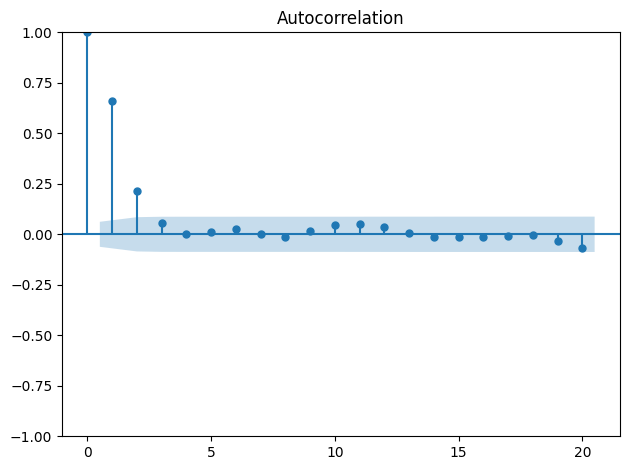

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(arma_1_1, lags = 20)
plt.tight_layout()

도식에서 사인 곡선 패턴을 확인할 수 있는데, 이는 자기회귀과정이 있음을 나타낸다.  또한 마지막으로 유의한 계수가 지연 2에 존재하므로 q=2라고 추론할 수 있다.  하지만 ARMA(1,1)프로세스를 시뮬레이션했으므로 q는 1이어야 한다.    
따라서 ACF도식을 사용하여 ARMA(p,q)프로세스의 차수 q를 추론할 수는 없다.

이제 PACF함수를 도식화해보자

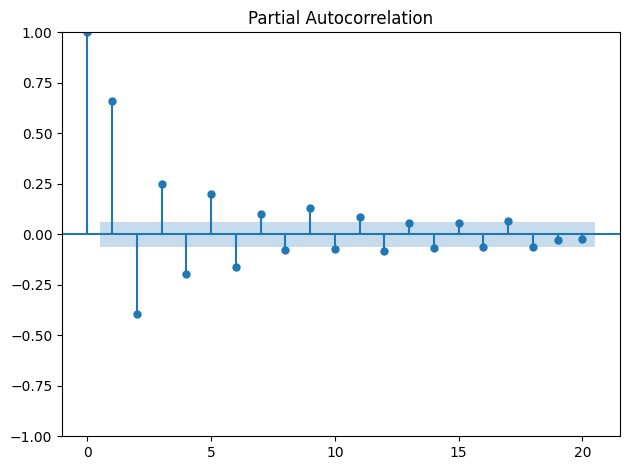

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(arma_1_1, lags = 20)

plt.tight_layout()

유의한 계수와 유의하지 않은 계수를 명확히 구분할 수 없는 명확한 사인 곡선 패턴을 볼 수 있는데, 이는 차수 p의 값을 유추할 수 없음을 뜻한다.  
따라서 PACF도식을 사용하여 ARMA(p,q)프로세스의 차수 p를 추론할 수는 없다.


In [ ]:
from itertools import product

ps = range(0,4,1)
qs = range(0,4,1)
order_list = list(product(ps,qs))


In [ ]:
import pandas as pd
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARMA(endog : Union[pd.Series, list], order_list : list) -> pd.DataFrame :
  results = []

  for order in tqdm_notebook(order_list):
    try :
      model = SARIMAX(endog, order = (order[0], 0, order[1]),
                      simple_differencing=False).fit(disp = False)
    except:
      continue

    aic = model.aic
    results.append([order, aic])

  result_df = pd.DataFrame(results)
  result_df.columns = ['order', 'aic']
  result_df = result_df.sort_values(by = 'aic', ascending =  True).reset_index(drop = True)

  return result_df

In [ ]:
result_df = optimize_ARMA(arma_1_1, order_list)
result_df

<ipython-input-12-58093940fc36>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,order,aic
0,"(1, 1)",2801.407785
1,"(2, 1)",2802.906070
2,"(1, 2)",2802.967762
3,"(0, 3)",2803.666793
4,"(1, 3)",2804.524027
5,"(3, 1)",2804.588567
6,"(2, 2)",2804.822282
7,"(3, 3)",2806.162939
8,"(2, 3)",2806.175380
9,"(3, 2)",2806.894930


AIC가 가장 낮은 모델이 ARMA(1,1)임을 확인할 수 있는데, 이는 우리가 시뮬레이션한 프로세스와 정확히 일치한다.  


이어서 Q-Q도식을 그리고, 융-박스 테스트를 진행해보자.

In [ ]:
model = SARIMAX(arma_1_1, order = (1,0,1), simple_differencing = False)
model_fit = model.fit(disp = False)
residuals = model_fit.resid

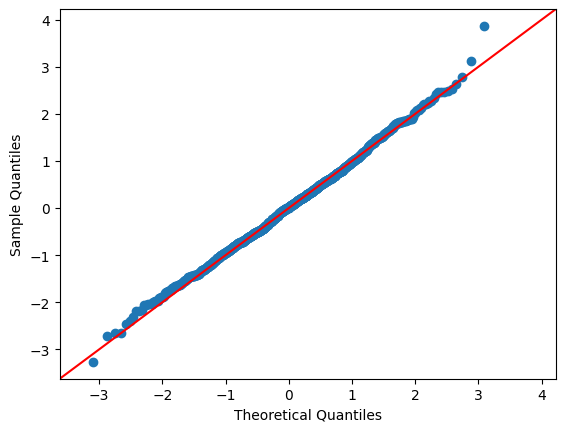

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line = '45');

대략 y=x직선과 겹쳐진 굵은 직선을 볼 수 있다. 따라서 정성적 관점에서 볼 때 모델의 잔차느 백색소음과 같이 정규분포를 보이며, 이는 모델이 데이터에 잘 피팅되었다는 것을 뜻한다.  

`plot_diagnostics`메서드를 사용하여 정석적 분석을 확장해보겠다.  

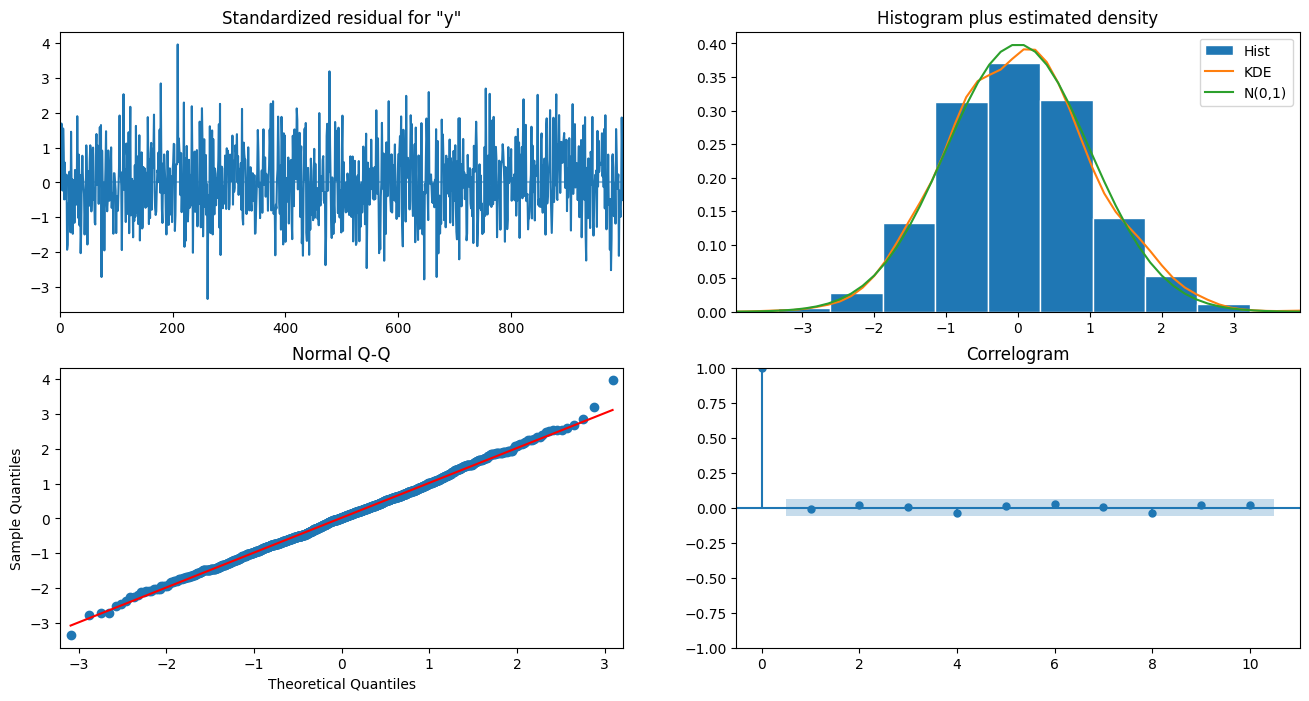

In [ ]:
model_fit.plot_diagnostics(figsize = (16,8));

### 정성적 분석 해석


마지막으로 융-박스 테스트를 수행해보겠다.  
이를 통해 잔차가 실제로 상관관계가 없는지 정량적으로 평가할 수 있다.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

tr = acorr_ljungbox(residuals, np.arange(1,11,1))
print(tr)

     lb_stat  lb_pvalue
1   0.030706   0.860897
2   0.528021   0.767966
3   0.540904   0.909817
4   2.079774   0.721089
5   2.271897   0.810385
6   2.896262   0.821750
7   2.900378   0.894063
8   4.418799   0.817501
9   4.787567   0.852419
10  5.246805   0.874093


### 정량적 분석 해석
